A redução de dimensionalidade é uma técnica fundamental em machine learning e análise de dados, especialmente útil quando se trabalha com conjuntos de dados de alta dimensão. Ela não só ajuda a diminuir o tempo de treinamento dos modelos, mas também pode melhorar seu desempenho ao mitigar o problema da maldição da dimensionalidade. Vamos explorar duas das técnicas mais populares de redução de dimensionalidade: Análise de Componentes Principais (PCA) e t-Distributed Stochastic Neighbor Embedding (t-SNE).

In [5]:
!pip install gensim
from gensim.models import KeyedVectors
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100") 
# Essa linha requer download de um modelo grande e conexão com a internet
 #= KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'banana', 'city', 'country', 'river',
         'ocean', 'mountain', 'sun', 'moon', 'star', 'computer', 'keyboard', 'mouse', 'screen', 'speaker']

word_embeddings = {word: model[word] for word in words if word in model}
word_embeddings


Defaulting to user installation because normal site-packages is not writeable


{'king': array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
        -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
        -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
        -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
         0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
         0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
        -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
         0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
         0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
        -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
         0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
        -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
         0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
        -0.91627 ,  0.64521 , 

In [8]:
import pandas as pd
word_embeddings
df = pd.DataFrame(word_embeddings).T


,index,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,king,-0.323070,-0.876160,0.219770,0.252680,0.229760,0.73880,-0.379540,-0.353070,-0.843690,...,0.056939,-0.713200,0.089623,0.413940,-1.336300,-0.619150,-0.330890,-0.528810,0.164830,-0.988780
1,queen,-0.500450,-0.708260,0.553880,0.673000,0.224860,0.60281,-0.261940,0.738720,-0.653830,...,-0.165740,-0.705840,0.430120,0.510510,-0.803300,-0.665720,-0.637170,-0.360320,0.133470,-0.560750
2,man,0.372930,0.385030,0.710860,-0.659110,-0.001013,0.92715,0.276150,-0.056203,-0.242940,...,0.286070,-0.375010,0.457420,0.045975,-0.246750,0.045656,-0.383020,-0.937110,0.039138,-0.539110
3,woman,0.593680,0.448250,0.593200,0.074134,0.111410,1.27930,0.166560,0.240700,0.390450,...,0.877510,-0.220080,0.824010,-0.092207,-0.459410,0.465710,-0.560180,-0.546480,0.151620,-0.307540
4,apple,-0.598500,-0.463210,0.130010,-0.019576,0.460300,-0.30180,0.897700,-0.656340,0.668580,...,0.307690,0.838040,-0.636550,-0.446390,-0.434060,-0.793640,-0.286750,-0.034398,1.343100,0.349040
5,orange,-0.149690,0.164770,-0.355320,-0.719150,0.621300,0.74140,0.689590,0.403710,-0.242390,...,0.248360,-0.839040,-1.294000,0.163620,-1.082000,-0.293070,-0.481250,0.335990,0.092629,-0.375950
6,banana,-0.340280,0.464360,-0.083324,0.201860,-0.178310,-0.46630,0.617930,0.301290,0.572800,...,-0.058326,0.414380,-1.041100,-0.426430,-0.506640,-0.758630,-0.158150,-0.183100,0.734300,-0.268520
7,city,0.265720,0.034857,0.490550,-0.674020,0.328830,0.99917,-1.030500,0.694920,0.343580,...,1.098700,-0.603980,-0.466830,0.147950,-1.341500,0.718800,-0.285890,0.391240,0.982320,0.069209
8,country,-0.109350,0.571090,0.982140,-0.070305,0.274660,0.13901,-0.672500,0.498990,0.217260,...,-0.142480,0.219250,-0.359280,-0.032169,-1.229300,0.206130,-0.206160,-0.583900,0.666220,0.229830
9,river,-0.332490,-0.566310,0.542550,-0.118690,0.531290,-0.49381,0.641140,0.859820,0.396330,...,-0.307450,-1.200900,-1.709700,0.514000,-1.015900,0.555550,-1.038500,-0.699400,1.050600,0.240510


In [17]:
X = df.reset_index().iloc[:,1:]

### Análise de Componentes Principais (PCA)

**PCA** é uma técnica estatística que transforma os dados originais em um conjunto de valores de componentes principais linearmente não correlacionados, ordenados por variância. A ideia é reduzir a dimensionalidade mantendo a maior parte da variância dos dados.

#### Implementação com `scikit-learn`:

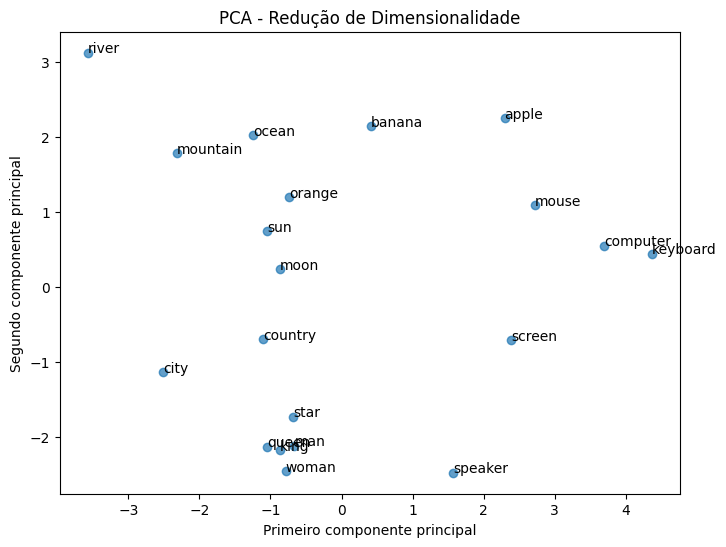

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supondo que X seja o nosso conjunto de dados com múltiplas dimensões
# Substitua isso pelo seu próprio conjunto de dados
# X = ...

pca = PCA(n_components=2)  # Reduzindo para 2 dimensões
X_pca = pca.fit_transform(X)

# Visualizando os componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')
plt.title('PCA - Redução de Dimensionalidade')
for i, txt in enumerate(words):
    plt.annotate(txt, (X_pca[:, 0][i], X_pca[:, 1][i]))

plt.show()


### t-Distributed Stochastic Neighbor Embedding (t-SNE)

**t-SNE** é uma técnica não-linear de redução de dimensionalidade ideal para a visualização de conjuntos de dados de alta dimensão. Ela converte afinidades de dados de alta dimensão em probabilidades conjuntas e tenta minimizar a divergência de Kullback-Leibler entre as probabilidades conjuntas dos dados de alta dimensão e os dados de baixa dimensão.

#### Implementação com `scikit-learn`:

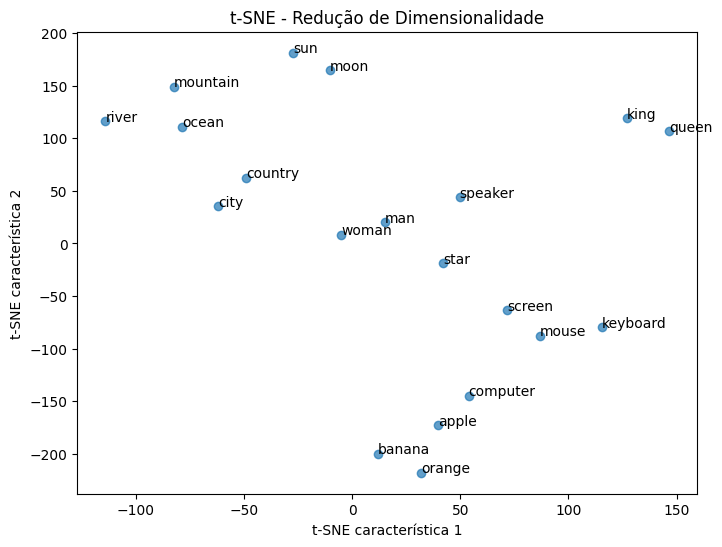

In [30]:
from sklearn.manifold import TSNE

# Assumindo que X é o seu conjunto de dados de alta dimensão
# X = ...

tsne = TSNE(n_components=2, random_state=42, perplexity=3)
X_tsne = tsne.fit_transform(X)

# Visualizando os dados após t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.xlabel('t-SNE característica 1')
plt.ylabel('t-SNE característica 2')
plt.title('t-SNE - Redução de Dimensionalidade')
for i, txt in enumerate(words):
    plt.annotate(txt, (X_tsne[:, 0][i], X_tsne[:, 1][i]))

plt.show()